# <font color="Red" size=350> <center> Prediction of Employee Turnover </center></font>

# Importer des bibliothèques

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt

# Acquérir des données
lire le fichier csv et stocker l'ensemble de données dans une base de données appelée "ds" 

In [81]:
ds = pd.read_csv('EmployeeTurnoverPrediction.csv')

In [82]:
ds.shape

(14999, 10)

In [83]:
ds.columns

Index(['niveau_satisfaction', 'derniere_evaluation', 'nombre_projets',
       'heures_mensuelles_moyennes', 'duree_passee_entreprise',
       'accident_du_travail', 'quitte', 'promotion_dernier_5ans',
       'departement', 'salaire'],
      dtype='object')

In [84]:
#Prévisualiser les données
ds.head()

,niveau_satisfaction,derniere_evaluation,nombre_projets,heures_mensuelles_moyennes,duree_passee_entreprise,accident_du_travail,quitte,promotion_dernier_5ans,departement,salaire
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [85]:
ds.tail()

,niveau_satisfaction,derniere_evaluation,nombre_projets,heures_mensuelles_moyennes,duree_passee_entreprise,accident_du_travail,quitte,promotion_dernier_5ans,departement,salaire
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


### En affichant les informations de l'ensemble de données

In [86]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   niveau_satisfaction         14999 non-null  float64
 1   derniere_evaluation         14999 non-null  float64
 2   nombre_projets              14999 non-null  int64  
 3   heures_mensuelles_moyennes  14999 non-null  int64  
 4   duree_passee_entreprise     14999 non-null  int64  
 5   accident_du_travail         14999 non-null  int64  
 6   quitte                      14999 non-null  int64  
 7   promotion_dernier_5ans      14999 non-null  int64  
 8   departement                 14999 non-null  object 
 9   salaire                     14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## Analyser la distribution des valeurs de caractéristiques numériques


In [87]:
ds.describe()

,niveau_satisfaction,derniere_evaluation,nombre_projets,heures_mensuelles_moyennes,duree_passee_entreprise,accident_du_travail,quitte,promotion_dernier_5ans
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# L'analyse exploratoire de données (ou EDA, pour Exploratory Data Analysis en anglais)

## Heures mensuelles (Monthly Hours)

In [88]:
ds["heures_mensuelles_moyennes"].unique()

array([157, 262, 272, 223, 159, 153, 247, 259, 224, 142, 135, 305, 234,
       148, 137, 143, 160, 255, 282, 147, 304, 139, 158, 242, 239, 128,
       132, 294, 134, 145, 140, 246, 126, 306, 152, 269, 127, 281, 276,
       182, 273, 307, 309, 225, 226, 308, 244, 286, 161, 264, 277, 275,
       149, 295, 151, 249, 291, 232, 130, 129, 155, 265, 279, 284, 221,
       154, 150, 267, 257, 177, 144, 289, 258, 263, 251, 133, 216, 300,
       138, 260, 183, 250, 292, 283, 245, 256, 278, 240, 136, 301, 243,
       296, 274, 164, 146, 261, 285, 141, 297, 156, 287, 219, 254, 228,
       131, 252, 236, 270, 298, 192, 248, 266, 238, 229, 233, 268, 231,
       253, 302, 271, 290, 235, 293, 241, 218, 199, 180, 195, 237, 227,
       172, 206, 181, 217, 310, 214, 198, 211, 222, 213, 202, 184, 204,
       288, 220, 299, 303, 212, 196, 179, 205, 230, 203, 280, 169, 188,
       178, 175, 166, 163, 168, 165, 189, 162, 215, 193, 176, 191, 174,
       201, 208, 171, 111, 104, 106, 100, 194, 209, 185, 200, 20

In [89]:
# calcule le nombre de valeurs uniques dans cette colonne
bins = len(ds["heures_mensuelles_moyennes"].unique())
bins

215

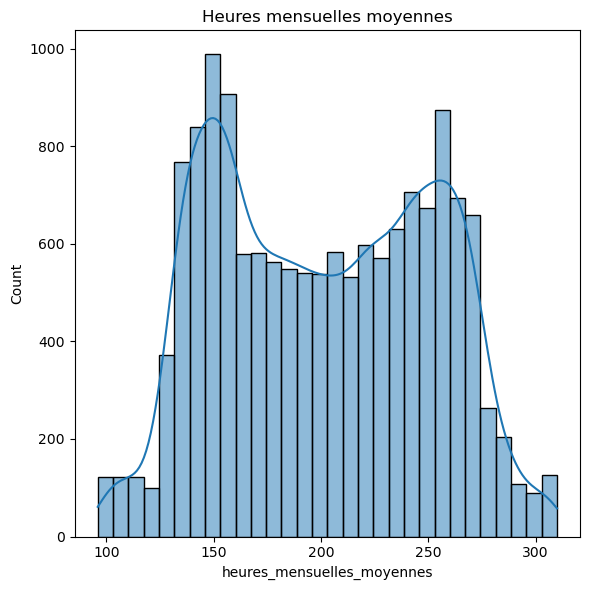

In [90]:
plt.figure(figsize=(6, 6)) #taille de la figure à créer
sns.histplot(data = ds, x = ds["heures_mensuelles_moyennes"], kde=True) # créer l'histogramme
plt.title("Heures mensuelles moyennes") #ajouter un titre 
plt.tight_layout() #ajuster les marges
plt.show() #afficher le graphique

## Nombre de projets(Number Of Projects) 

In [91]:
ds["nombre_projets"].value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: nombre_projets, dtype: int64

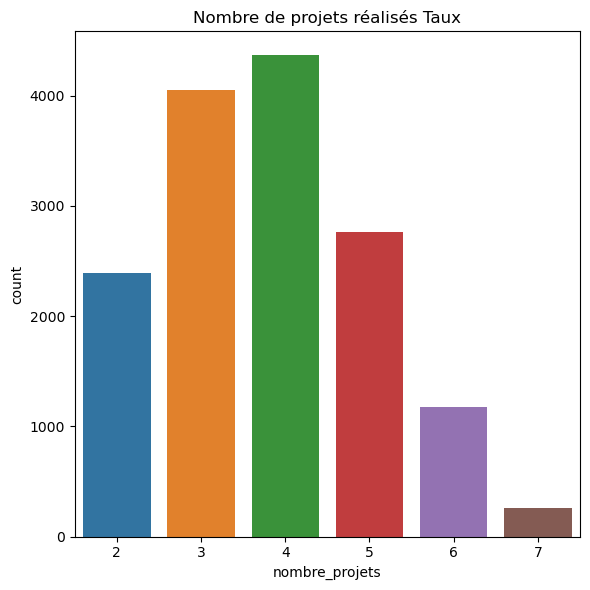

In [92]:
plt.figure(figsize=(6, 6))
sns.countplot(data=ds, x="nombre_projets")
plt.title("Nombre de projets réalisés Taux")
plt.tight_layout()
plt.show()

## Promotion faite au cours des 5 dernières années(Promotion Made In The Last 5 Years) 

In [93]:
ds["promotion_dernier_5ans"].value_counts()

0    14680
1      319
Name: promotion_dernier_5ans, dtype: int64

In [94]:
labels = ds["promotion_dernier_5ans"].value_counts().index.tolist()
labels

[0, 1]

In [95]:
labels = ["Promu" if i == 1 else "Pas promu" for i in labels]
labels

['Pas promu', 'Promu']

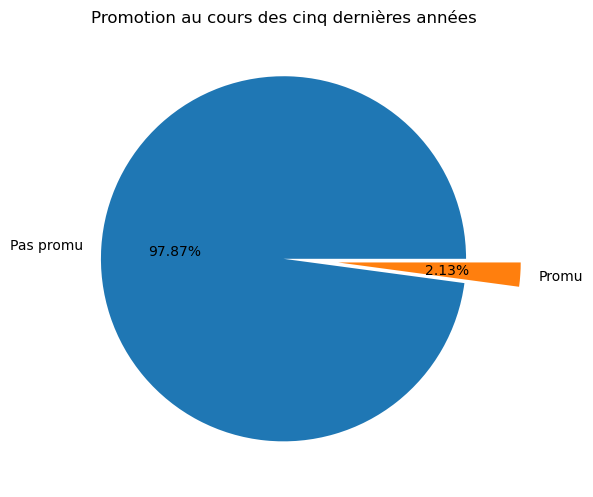

In [96]:
plt.figure(figsize=(6, 6))
plt.pie(x = ds["promotion_dernier_5ans"].value_counts(), labels=labels, autopct="%1.2f%%", explode=[0, 0.3])
plt.title("Promotion au cours des cinq dernières années")
plt.tight_layout()
plt.show()

## Accident du travail

In [97]:
ds["accident_du_travail"].value_counts()

0    12830
1     2169
Name: accident_du_travail, dtype: int64

In [98]:
labels = ds["accident_du_travail"].value_counts().index.tolist()
labels

[0, 1]

In [99]:
labels = ["Accident du travail" if i == 1 else "Aucun accident du travail" for i in labels]
labels

['Aucun accident du travail', 'Accident du travail']

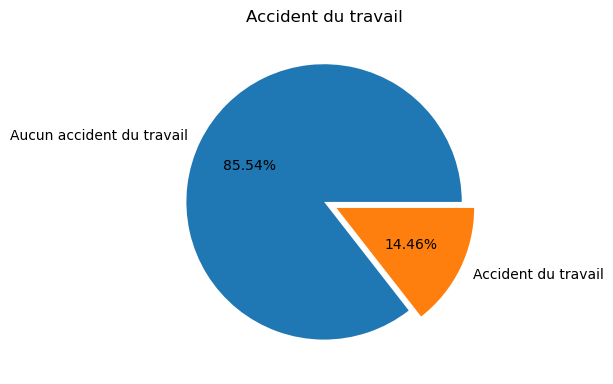

In [100]:
plt.figure(figsize=(6, 6))
plt.pie(x = ds["accident_du_travail"].value_counts(), labels=labels, autopct="%1.2f%%", explode=[0, 0.1])
plt.title("Accident du travail")
plt.tight_layout()
plt.show()

## Durée passée dans l'entreprise 

In [101]:
ds["duree_passee_entreprise"].value_counts()

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: duree_passee_entreprise, dtype: int64

In [102]:
labels = ds["duree_passee_entreprise"].value_counts().index.tolist()
labels

[3, 2, 4, 5, 6, 10, 7, 8]

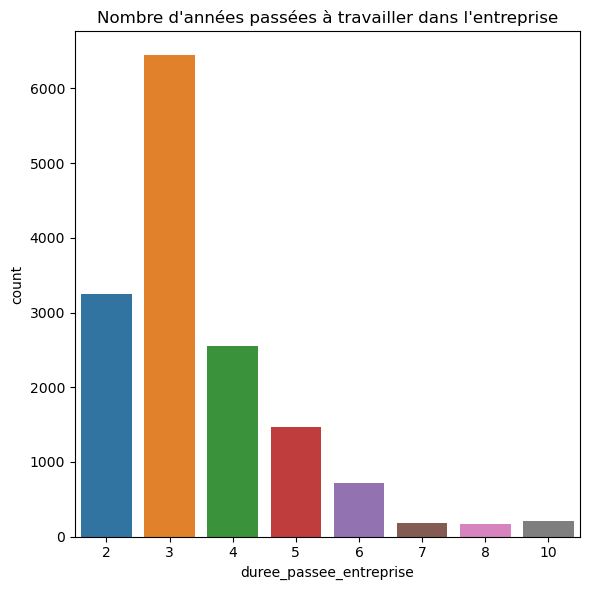

In [103]:
plt.figure(figsize=(6, 6))
sns.countplot(x = "duree_passee_entreprise", data=ds)
plt.title("Nombre d'années passées à travailler dans l'entreprise")
plt.tight_layout()
plt.show()

In [104]:
ds["duree_passee_entreprise"].mean()

3.498233215547703

## Comparaison des départements

In [105]:
ds["departement"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [106]:
ds["departement"].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: departement, dtype: int64

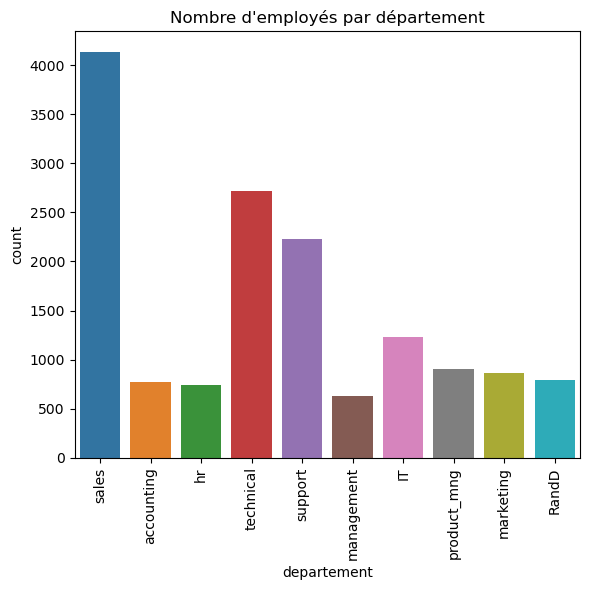

In [107]:
plt.figure(figsize=(6, 6))
sns.countplot(x = "departement", data=ds)
plt.title("Nombre d'employés par département")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [108]:
ds["salaire"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [109]:
ds["salaire"].value_counts()

low       7316
medium    6446
high      1237
Name: salaire, dtype: int64

In [110]:
labels = ds["salaire"].value_counts().index.tolist()
labels

['low', 'medium', 'high']

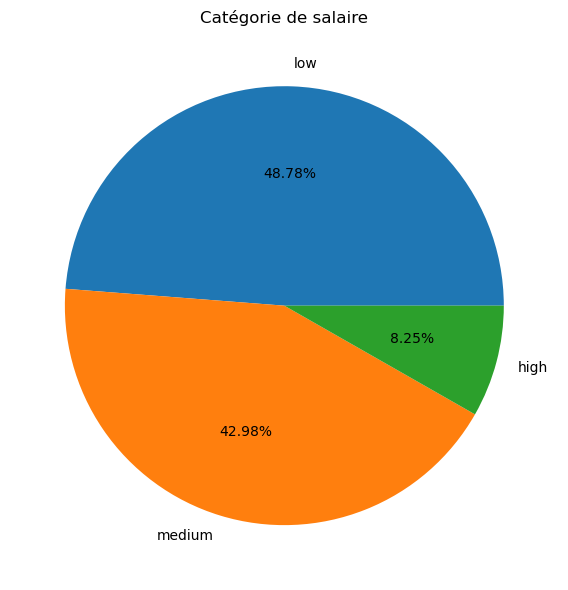

In [111]:
plt.figure(figsize=(6, 6))
plt.pie(x = ds["salaire"].value_counts(), labels=labels, autopct="%1.2f%%")
plt.title("Catégorie de salaire")
plt.tight_layout()
plt.show()

## Trouver la corrélation entre les données et le taux de départ 

,niveau_satisfaction,derniere_evaluation,nombre_projets,heures_mensuelles_moyennes,duree_passee_entreprise,accident_du_travail,quitte,promotion_dernier_5ans
niveau_satisfaction,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
derniere_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
nombre_projets,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
heures_mensuelles_moyennes,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
duree_passee_entreprise,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
accident_du_travail,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
quitte,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_dernier_5ans,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


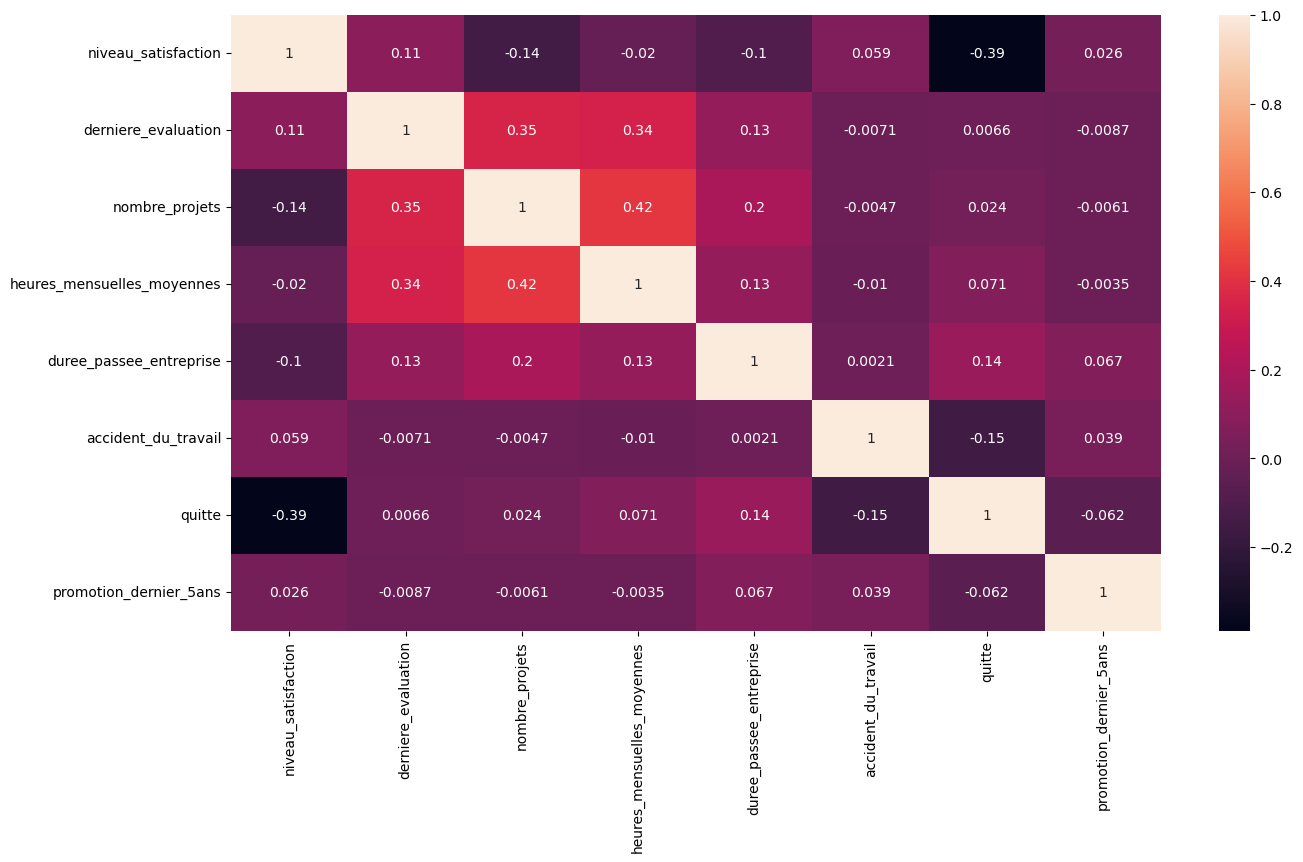

In [112]:
corr = ds.corr()
corr = (corr)
plt.figure(figsize = (15,8))
sns.heatmap(corr, annot = True, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

# Analyse Bivariée


## L'impact de duree_passee_entreprise sur le pourcentage de départ de l'entreprise

In [113]:
ds[['quitte', 'accident_du_travail']].groupby(['quitte'], as_index=False).mean().sort_values(by='accident_du_travail', ascending=False)

,quitte,accident_du_travail
0,0,0.175009
1,1,0.047326


## L'impact de duree_passee_entreprise sur le pourcentage de départ de l'entreprise

In [114]:
ds[['quitte', 'duree_passee_entreprise']].groupby(['duree_passee_entreprise'],as_index=False).mean().sort_values(by='quitte', ascending=False)

,duree_passee_entreprise,quitte
3,5,0.565513
2,4,0.348064
4,6,0.291086
1,3,0.246159
0,2,0.016338
5,7,0.000000
6,8,0.000000
7,10,0.000000


## L'impact de salaire sur le pourcentage de départ de l'entreprise

In [115]:
ds[['quitte', 'salaire']].groupby(['salaire'], as_index=False).mean().sort_values(by='quitte', ascending=False)

,salaire,quitte
1,low,0.296884
2,medium,0.204313
0,high,0.066289


# Visualisez et convertissez des données continues en données discrètes


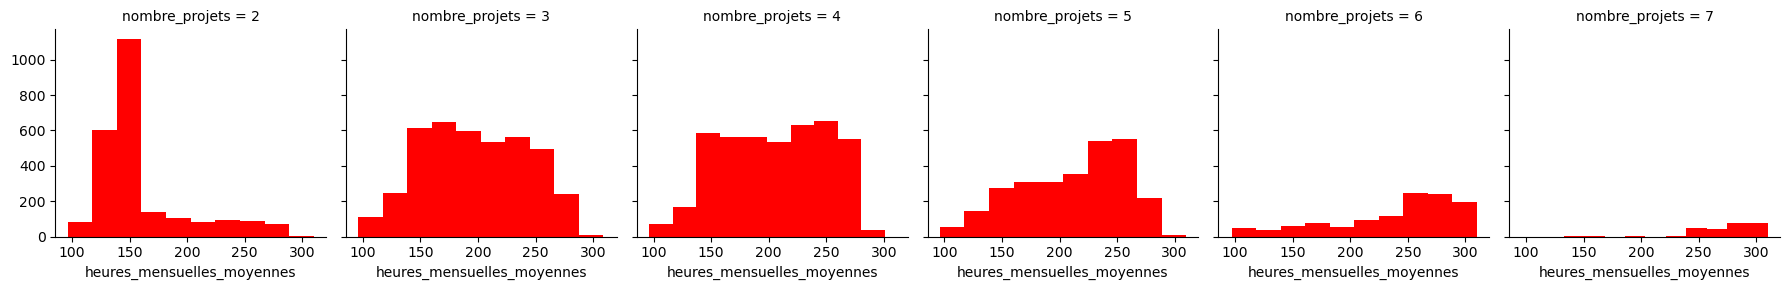

In [116]:
g = sns.FacetGrid(ds, col='nombre_projets')
g.map(plt.hist, 'heures_mensuelles_moyennes', bins=10,color='r')

## L'impact de heures_mensuelles_moyennes sur le pourcentage de départ de l'entreprise

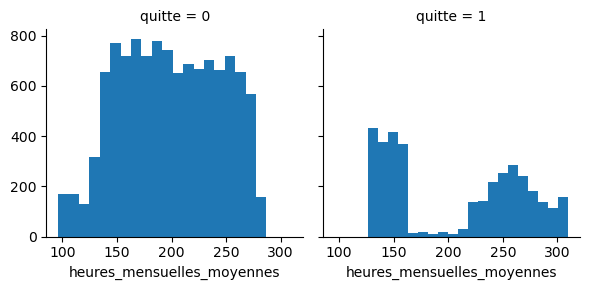

In [117]:
g = sns.FacetGrid(ds, col='quitte')
g.map(plt.hist, 'heures_mensuelles_moyennes', bins=20)

## L'impact de niveau_satisfaction sur le pourcentage de départ de l'entreprise

In [118]:
corr = ds['quitte'].corr(ds['niveau_satisfaction'])
print(corr)

-0.38837498342410504


In [119]:
px.scatter(ds, x='niveau_satisfaction', y='quitte',
           color='quitte',
           marginal_y='violin',
           trendline='ols')

In [120]:
ds.loc[ ds['niveau_satisfaction'] <= 0.25, 'niveau_satisfaction'] = 0
ds.loc[(ds['niveau_satisfaction'] > 0.25) & (ds['niveau_satisfaction'] <= 0.5), 'niveau_satisfaction'] = 1
ds.loc[(ds['niveau_satisfaction'] > 0.5) & (ds['niveau_satisfaction'] <= 0.75), 'niveau_satisfaction']   = 0
ds.loc[ ds['niveau_satisfaction'] > 0.75, 'niveau_satisfaction'] = 1
ds['niveau_satisfaction'] = ds['niveau_satisfaction'].astype(int)

In [121]:
ds.head()

,niveau_satisfaction,derniere_evaluation,nombre_projets,heures_mensuelles_moyennes,duree_passee_entreprise,accident_du_travail,quitte,promotion_dernier_5ans,departement,salaire
0,1,0.53,2,157,3,0,1,0,sales,low
1,1,0.86,5,262,6,0,1,0,sales,medium
2,0,0.88,7,272,4,0,1,0,sales,medium
3,0,0.87,5,223,5,0,1,0,sales,low
4,1,0.52,2,159,3,0,1,0,sales,low


## L'impact de la dernière évaluation sur le pourcentage de départ de l'entreprise

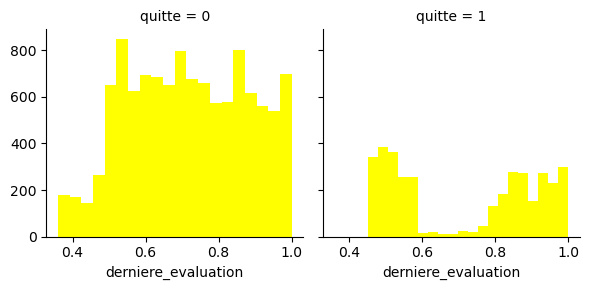

In [122]:
g = sns.FacetGrid(ds, col='quitte')
g.map(plt.hist, 'derniere_evaluation', bins=20, color='yellow')

In [123]:
ds.loc[ ds['derniere_evaluation'] <= 0.56, 'derniere_evaluation'] = 0
ds.loc[(ds['derniere_evaluation'] > 0.56) & (ds['derniere_evaluation'] <= 0.80), 'derniere_evaluation'] = 1
ds.loc[ ds['derniere_evaluation'] > 0.80, 'derniere_evaluation'] = 0
ds['derniere_evaluation'] = ds['derniere_evaluation'].astype(int)

In [124]:
ds.head()

,niveau_satisfaction,derniere_evaluation,nombre_projets,heures_mensuelles_moyennes,duree_passee_entreprise,accident_du_travail,quitte,promotion_dernier_5ans,departement,salaire
0,1,0,2,157,3,0,1,0,sales,low
1,1,0,5,262,6,0,1,0,sales,medium
2,0,0,7,272,4,0,1,0,sales,medium
3,0,0,5,223,5,0,1,0,sales,low
4,1,0,2,159,3,0,1,0,sales,low


# Traitement des données


In [126]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   niveau_satisfaction         14999 non-null  int32 
 1   derniere_evaluation         14999 non-null  int32 
 2   nombre_projets              14999 non-null  int64 
 3   heures_mensuelles_moyennes  14999 non-null  int64 
 4   duree_passee_entreprise     14999 non-null  int64 
 5   accident_du_travail         14999 non-null  int64 
 6   quitte                      14999 non-null  int64 
 7   promotion_dernier_5ans      14999 non-null  int64 
 8   departement                 14999 non-null  object
 9   salaire                     14999 non-null  object
dtypes: int32(2), int64(6), object(2)
memory usage: 1.0+ MB


In [127]:
ol = [] 
for obj in ds['salaire']:
   if obj not in ol:
    print (obj)
    ol.append(obj)

low
medium
high


In [128]:
ds['salaire'] = ds['salaire'].map( {'high':2 ,'medium': 1, 'low': 0} ).astype(int)
ds.head()

,niveau_satisfaction,derniere_evaluation,nombre_projets,heures_mensuelles_moyennes,duree_passee_entreprise,accident_du_travail,quitte,promotion_dernier_5ans,departement,salaire
0,1,0,2,157,3,0,1,0,sales,0
1,1,0,5,262,6,0,1,0,sales,1
2,0,0,7,272,4,0,1,0,sales,1
3,0,0,5,223,5,0,1,0,sales,0
4,1,0,2,159,3,0,1,0,sales,0


In [129]:
old = [] 
for obj in ds['departement']:
   if obj not in old:
    print (obj)
    old.append(obj)

sales
accounting
hr
technical
support
management
IT
product_mng
marketing
RandD


In [130]:
ds['departement'] = ds['departement'].map( {'sales':9 , 'accounting':8 , 'hr':7, 'technical':6,  'support':5,  'management':4, 'IT':3,  'product_mng':2,  'marketing':1,  'RandD':0} ).astype(float)
ds.head()

,niveau_satisfaction,derniere_evaluation,nombre_projets,heures_mensuelles_moyennes,duree_passee_entreprise,accident_du_travail,quitte,promotion_dernier_5ans,departement,salaire
0,1,0,2,157,3,0,1,0,9.0,0
1,1,0,5,262,6,0,1,0,9.0,1
2,0,0,7,272,4,0,1,0,9.0,1
3,0,0,5,223,5,0,1,0,9.0,0
4,1,0,2,159,3,0,1,0,9.0,0


## Vérifier les données manquantes et dupliquées ¶



In [131]:
#ds.isna().sum() : compter le nombre de valeurs manquantes pour chaque variable (ou colonne)
#ds.isnull().any(): permet de vérifier si les données contiennent des valeurs nulles (ou manquantes)
ds.isnull().any()

niveau_satisfaction           False
derniere_evaluation           False
nombre_projets                False
heures_mensuelles_moyennes    False
duree_passee_entreprise       False
accident_du_travail           False
quitte                        False
promotion_dernier_5ans        False
departement                   False
salaire                       False
dtype: bool

In [132]:
ds.duplicated(keep="first").sum()

4065

In [133]:
ds.drop_duplicates(inplace=True)

In [134]:
ds.shape

(10934, 10)

# Créer une nouvelle colonne à partir de données existantes¶



In [135]:
ds["proj*hour"] = ds.nombre_projets * ds.heures_mensuelles_moyennes
ds.loc[:, ['proj*hour','nombre_projets','heures_mensuelles_moyennes']].head(5)

,proj*hour,nombre_projets,heures_mensuelles_moyennes
0,314,2,157
1,1310,5,262
2,1904,7,272
3,1115,5,223
4,318,2,159


# Supprimer les jeux de données en double


In [136]:
ds = ds.drop(['nombre_projets','heures_mensuelles_moyennes'], axis=1)

In [137]:
ds.columns

Index(['niveau_satisfaction', 'derniere_evaluation', 'duree_passee_entreprise',
       'accident_du_travail', 'quitte', 'promotion_dernier_5ans',
       'departement', 'salaire', 'proj*hour'],
      dtype='object')

# Exportation du dataset pour l'utiliser avec weka


In [143]:
#ds.to_csv('NewData.csv', index=False)

# Séparer les ensembles de données d'entraînement et de test


In [144]:
nTete = int(len(ds)*0.85)
nQueue = int(len(ds)*0.15)
X_train = ds.drop("quitte", axis=1).head(nTete)
X_test  = ds.drop("quitte", axis=1).tail(nQueue)
Y_train = ds["quitte"].head(nTete)
Y_test = ds["quitte"].tail(nQueue)

In [145]:
X_train.shape

(9293, 8)

In [146]:
X_test.shape

(1640, 8)

# Modélisation supérvisé


## Régression logistique

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error
logReg = LogisticRegression(max_iter=2000)
logReg.fit(X_train, Y_train)
logReg_predictions = logReg.predict(X_test)
res=round(logReg.score(X_test, Y_test) * 100, 2)
res

83.84

## DecisionTreeClassifier


In [148]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
acc_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)
acc_decision_tree

94.7

## RandomForestClassifier

In [149]:
from sklearn.ensemble import RandomForestClassifier
ranForest = RandomForestClassifier(n_estimators=100)
ranForest.fit(X_train, Y_train)
ranForest_predictions = ranForest.predict(X_test)
acc = round(ranForest.score(X_test, Y_test) * 100, 2)
acc

96.71

## SVC (Support Vector Classifier)  

In [150]:
from sklearn.svm import SVC, LinearSVC
svc = SVC()
svc.fit(X_train, Y_train)
acc_svc = round(svc.score(X_test, Y_test) * 100, 2)
acc_svc

98.66

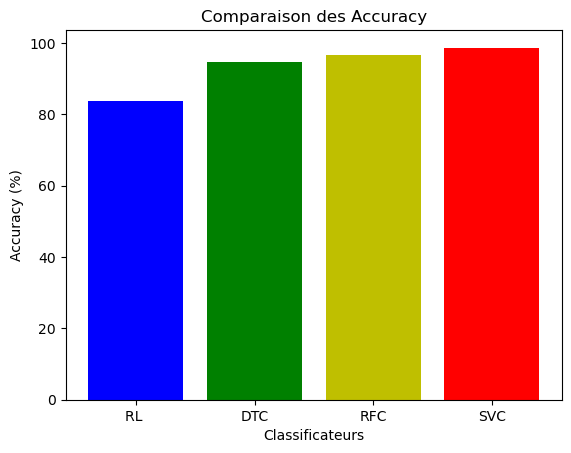

In [159]:
scores = [83.84, 94.57, 96.71, 98.66]
classifiers = ['RL ', 'DTC', 'RFC', 'SVC']
colors = ['b', 'g', 'y', 'r']
plt.bar(classifiers, scores, color=colors)
plt.title('Comparaison des Accuracy')
plt.xlabel('Classificateurs')
plt.ylabel('Accuracy (%)')
plt.show()


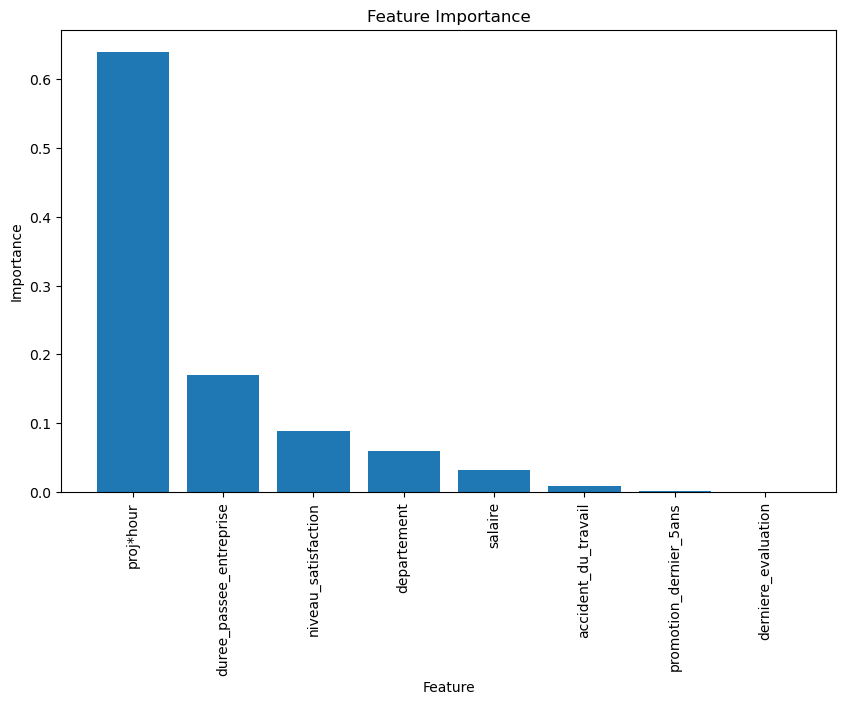

In [155]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import numpy as np

feature_importances = decision_tree.feature_importances_


feature_names = X_train.columns 

sorted_feature_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_feature_indices])
plt.xticks(range(len(feature_importances)), feature_names[sorted_feature_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


# Linear regression model

In [152]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Créez et entraînez le modèle de régression linéaire
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, Y_train)

# Prédictions sur l'ensemble de test
predictions = linear_regression_model.predict(X_test)

# Évaluations des performances du modèle
mae = mean_absolute_error(Y_test, predictions)
rmse = mean_squared_error(Y_test, predictions, squared=False)

# Afficher les résultats
print("Mean absolute error (MAE):", mae)
print("Root mean squared error (RMSE):", rmse)


Mean absolute error (MAE): 0.22919070086983223
Root mean squared error (RMSE): 0.3061042940202504


# Random forest model

In [153]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Créez et entraînez le modèle RandomForestRegressor
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, Y_train)

# Prédictions sur l'ensemble de test
predictions = random_forest_model.predict(X_test)

# Évaluations des performances du modèle
mae = mean_absolute_error(Y_test, predictions)
rmse = mean_squared_error(Y_test, predictions, squared=False)

# Afficher les résultats
print("Mean absolute error (MAE):", mae)
print("Root mean squared error (RMSE):", rmse)


Mean absolute error (MAE): 0.03170731707317073
Root mean squared error (RMSE): 0.178065485350673


### Évaluations des performances (weka)
![Évaluations des performances (weka)](rf.png)


# Decision tree model

In [154]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Créez et entraînez le modèle DecisionTreeRegressor
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, Y_train)

# Prédictions sur l'ensemble de test
predictions = decision_tree_model.predict(X_test)

# Évaluations des performances du modèle

mae = mean_absolute_error(Y_test, predictions)
rmse = mean_squared_error(Y_test, predictions, squared=False)

# Afficher les résultats

print("Mean absolute error (MAE):", mae)
print("Root mean squared error (RMSE):", rmse)


Mean absolute error (MAE): 0.05518292682926829
Root mean squared error (RMSE): 0.2339350545687789


### Évaluations des performances (weka)
![Évaluations des performances (weka)](dt.png)
